In [1]:
import os
import sys
sys.path.insert(1, os.path.join(os.getcwd(), ".."))

import hidrostats
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action="ignore")

#### Preparação dos dados

In [2]:
entrada = os.path.join(os.getcwd(), "..", "entrada", "vazoes_diarias_1969_2019_preenchido.pkl")
df = pd.read_pickle(entrada)

df = df[["furnas", "sao_simao", "sobradinho", "b_esperanca", "tucurui", "santo_antonio", "passo_real", "g_b_munhoz"]]

In [3]:
ds = hidrostats.Vazao(df)

In [4]:
ds.vazao = ds.vazao.rename({"data": "time"})

In [5]:
periodo_1 = ds.vazao.sel(time=slice('1969-01-01', '1999-01-01'))
periodo_2 = ds.vazao.sel(time=slice('1999-01-01', '2019-12-01'))

periodos = [periodo_1, periodo_2]

#### Mann-Kendall

In [6]:
for periodo in periodos:
    dfs = []
    for usina in periodo:
        dfs.append(hidrostats.Vazao(periodo[usina]).mannKendall(mann_kendall_ref = "yue wang", 
                                                                retorna_df = True, 
                                                                period = 6))
    
    df = pd.concat(dfs, axis = 1)
    df.to_pickle(os.path.join(os.getcwd(), "..", "saída", "arquivos", f"mannkendall_{pd.to_datetime(periodo.time[0].values).year}_{pd.to_datetime(periodo.time[-1].values).year}.pkl"))

#### Análise de vazão

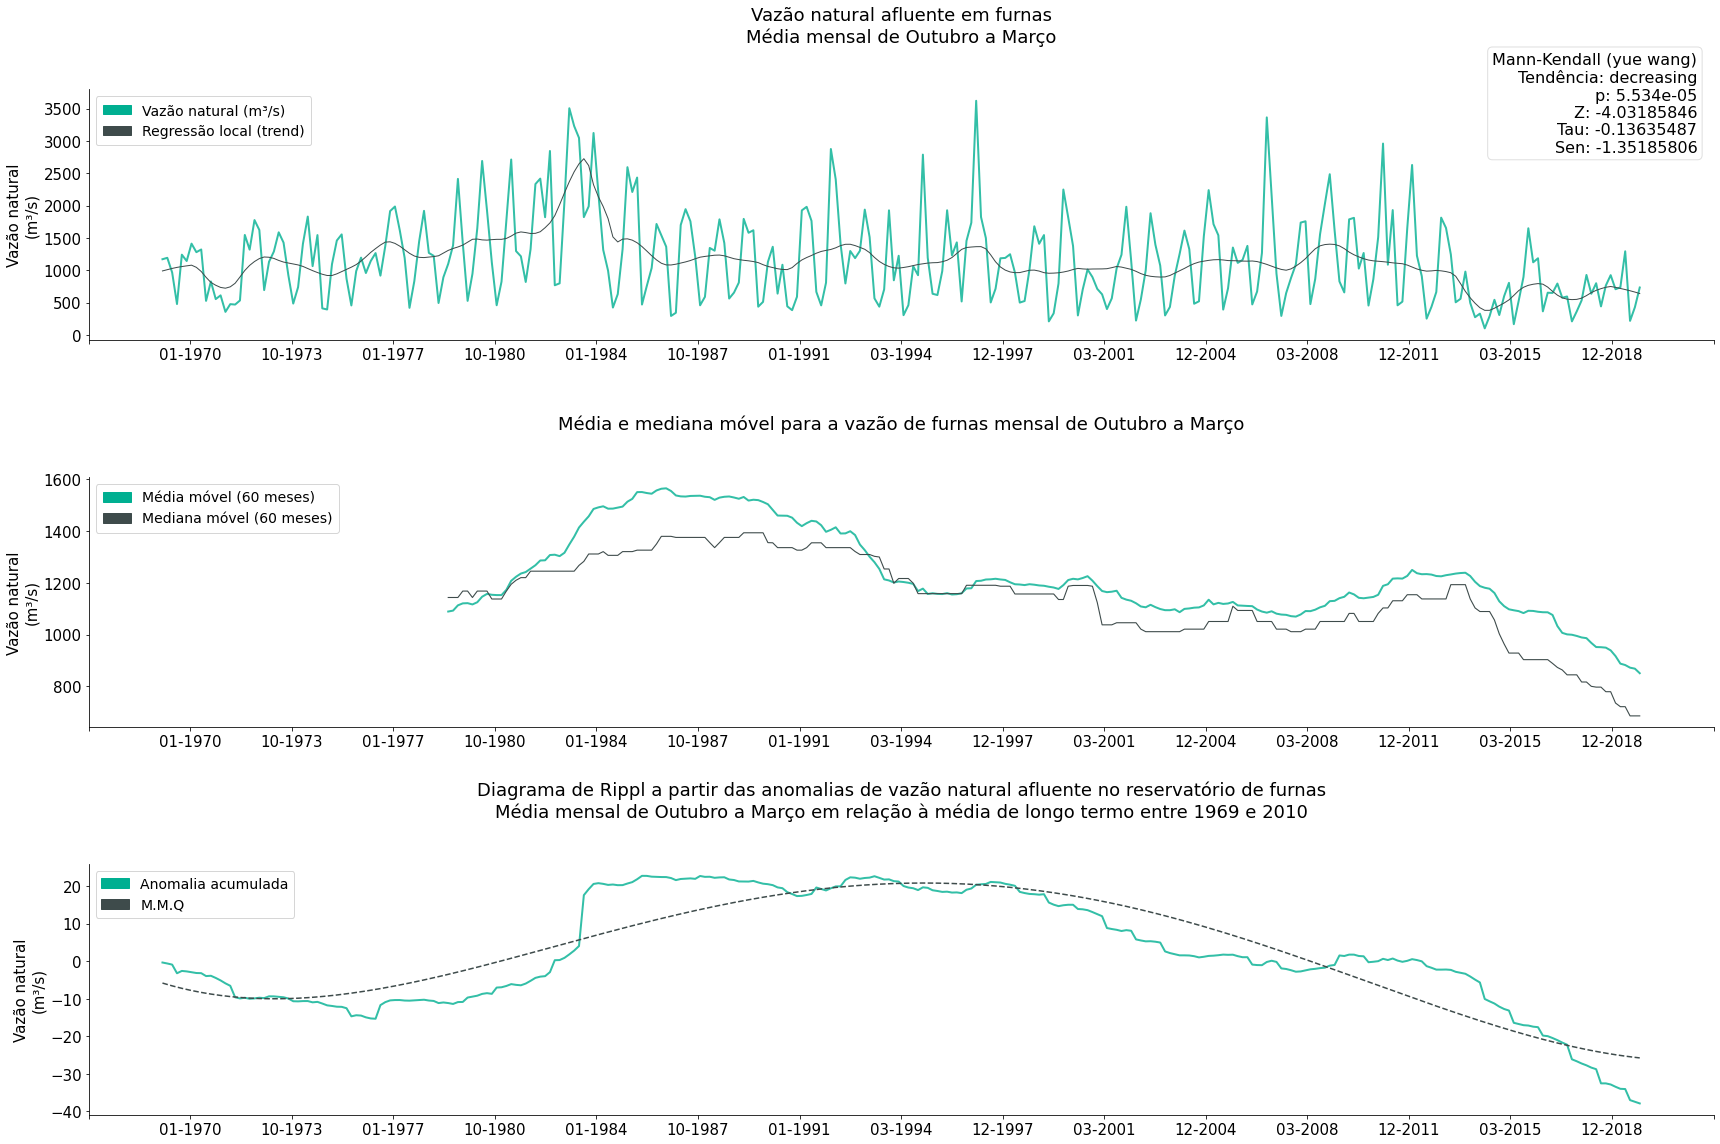

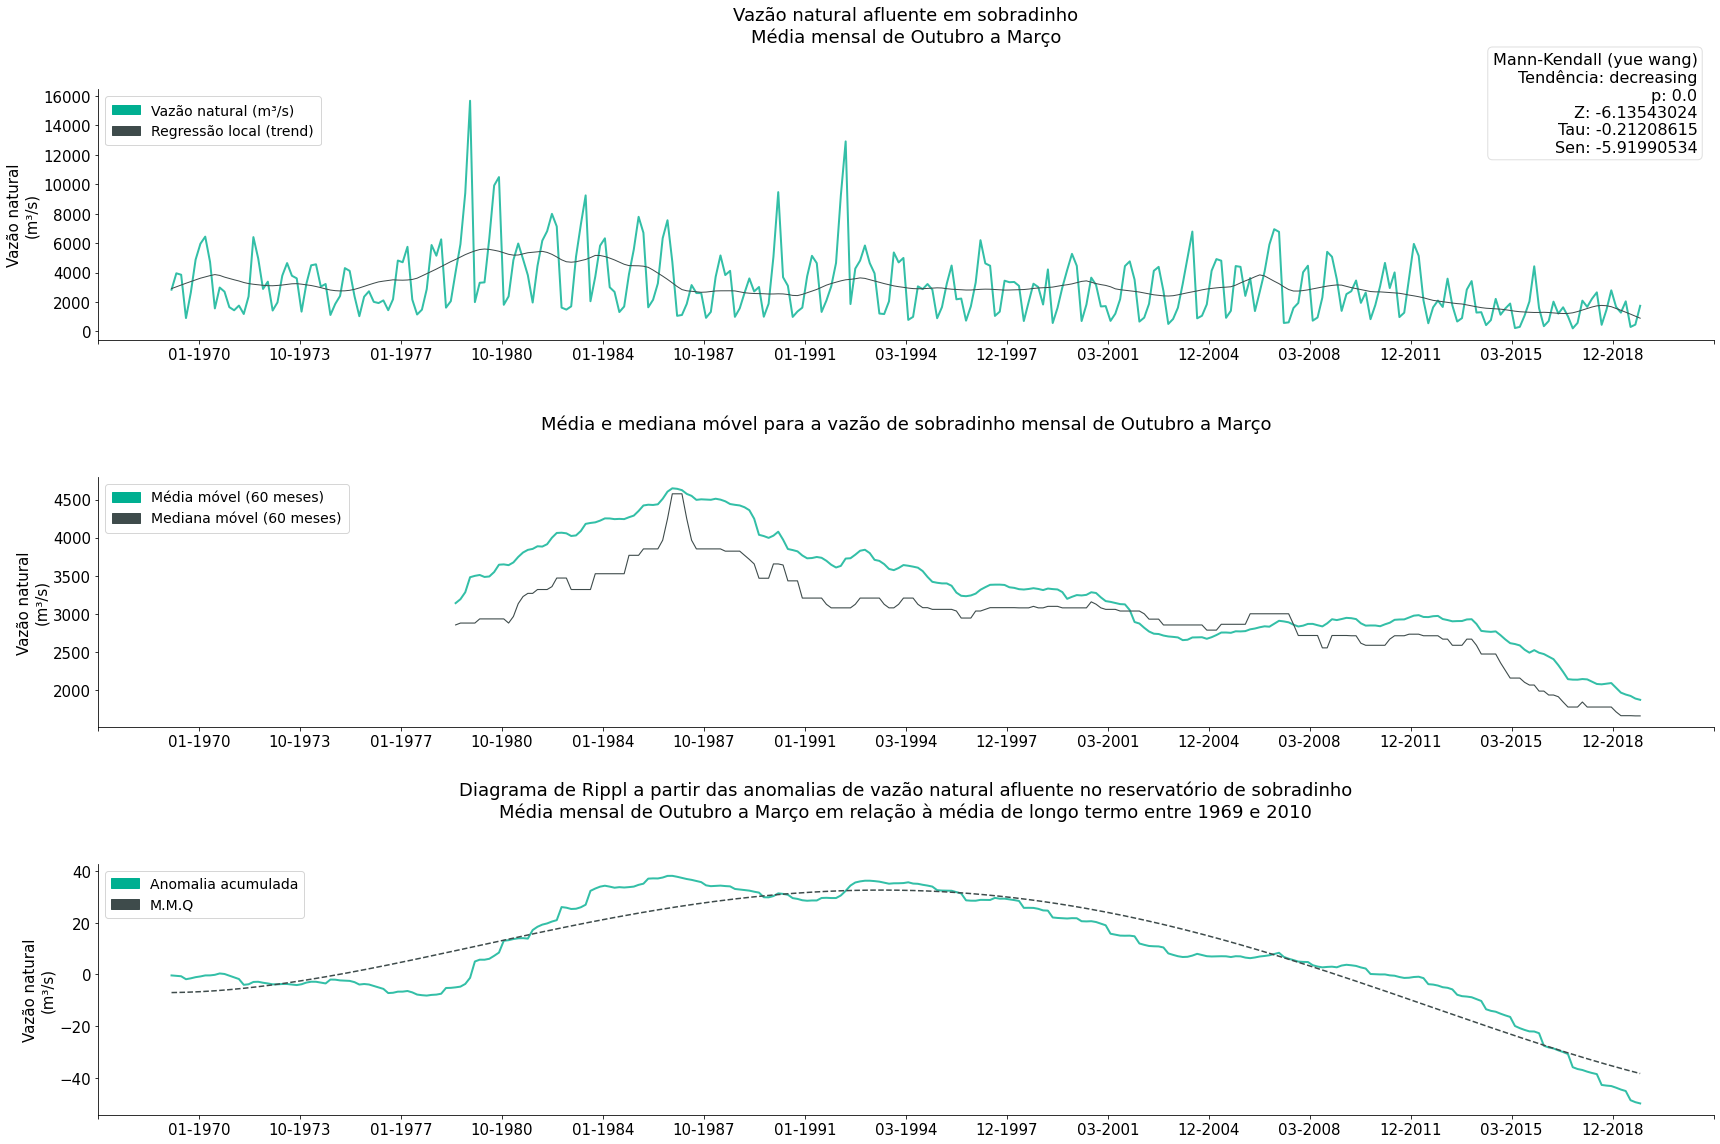

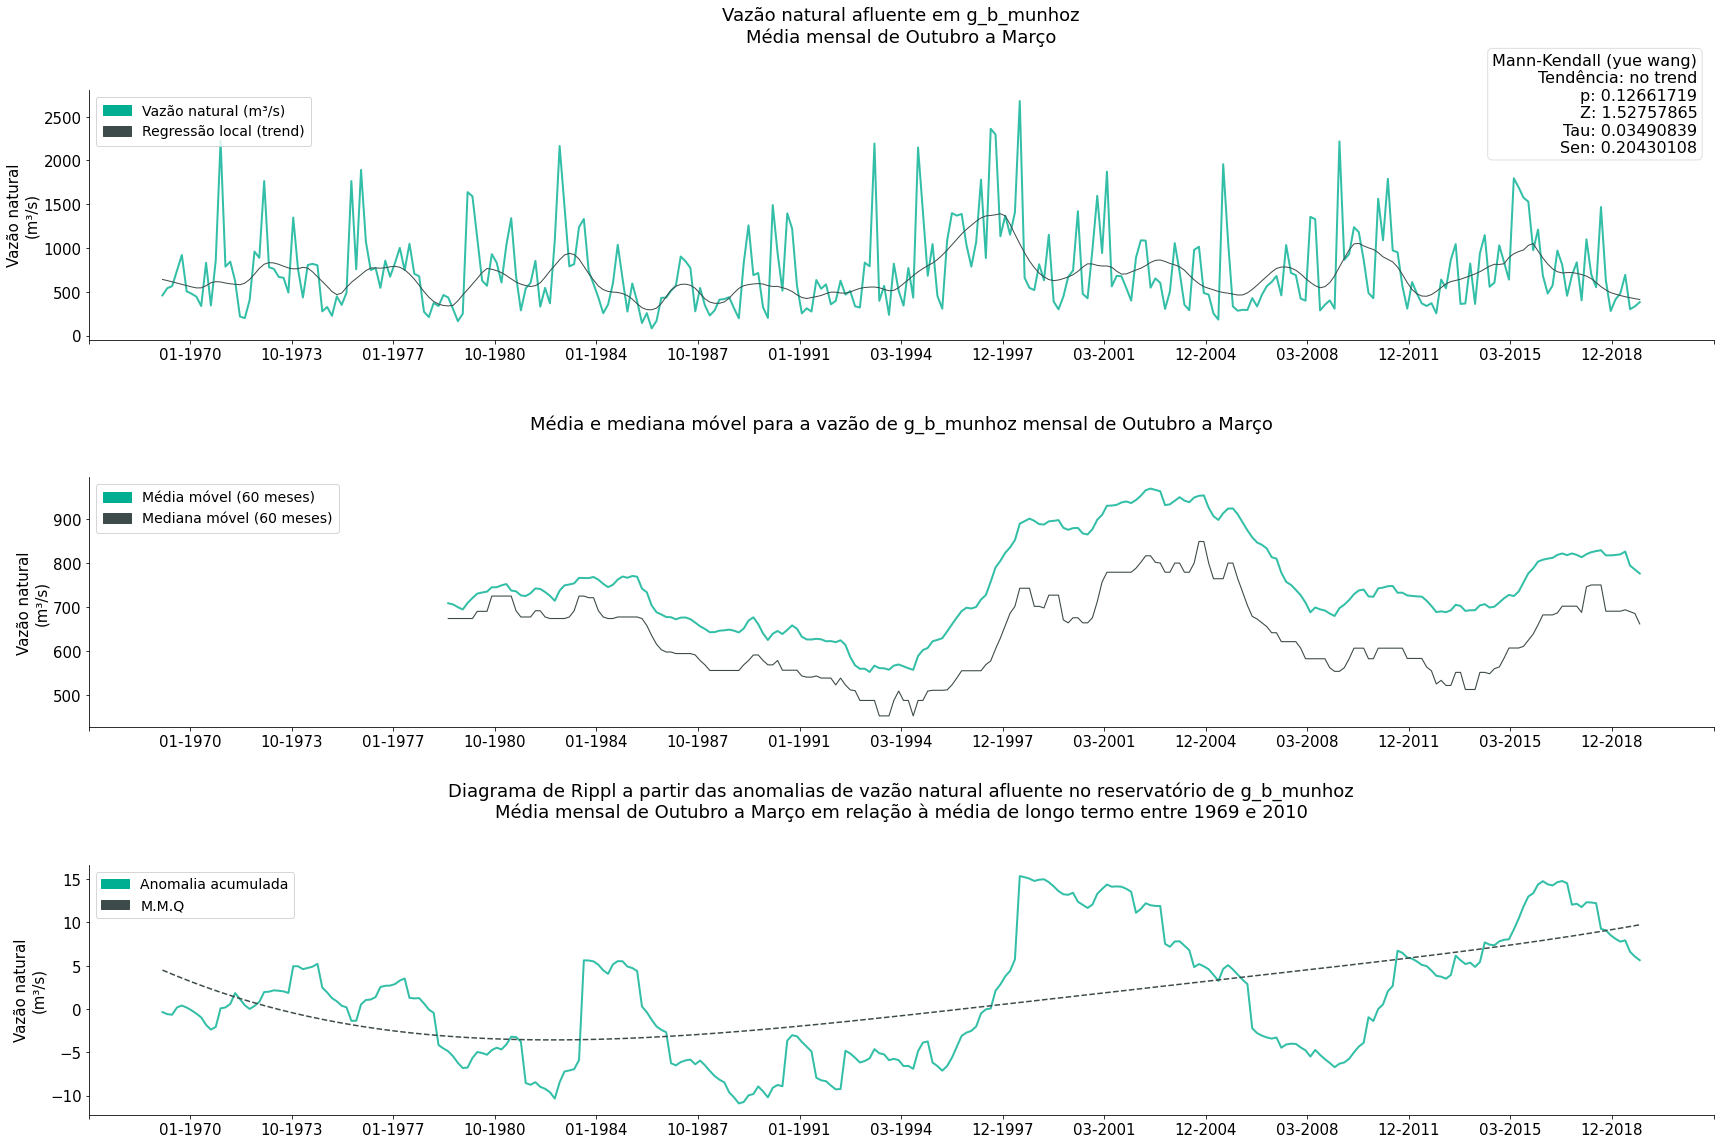

In [7]:
for usina in ds.vazao:
    if usina in ["furnas", "g_b_munhoz", "sobradinho"]:
        hidrostats.Vazao(ds.vazao[usina]).analiseVazao(mann_kendall_ref = 'yue wang',
                                                       periodo_loess = 6, 
                                                       recorte=" de Outubro a Março", 
                                                       robust = True, 
                                                      dir_saida = os.path.join(os.getcwd(), "..", "saída", "img", f"{usina}"))